<a href="https://colab.research.google.com/github/MShkarbanenko/Bachelor-graduate-work/blob/main/Ternary_Potts_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Импортируем необходимые библиотеки.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import scipy.stats as sps
import copy
import pandas as pd

В этом блоке написаны необходимые функции для генерации множества агентов S, их распределений Hi, выбора агентов, расчета их полезности и расчета вектора m.

In [ ]:
def soa_generator(N, E):
  S = np.array([E[2]]*N)
  return S

def Hi_generator(N):
  return np.random.normal(0, 0.05, size=(N, 2))

def soa_configuration_info(S, E):
  soa_configuration = {}
  for i, e in enumerate(E):
    soa_configuration['e{}'.format(i)] = len(S[(S[:,0] == e[0]) & (S[:,1] == e[1])])
  return soa_configuration

def agent_expected_utility(Hi, H, J, N, i, S):
  neighbors_contribution = (J/N)*sum([np.dot(S[k], S[i]) for k in range(N) if k != i])
  #neighbors_contribution = 0
  personal_contribution = np.dot(Hi[i], S[i])
  external_contribution = np.dot(H, S[i])
  return (neighbors_contribution + personal_contribution + external_contribution)

def agent_choice(Hi, H, J, E, N, i, S):
  u = np.zeros(len(E))
  for k in range(len(u)):
      S[i] = E[k]
      u[k] = agent_expected_utility(Hi, H, J, N, i, S)
  index_max_u = [k for k in range(len(u)) if u[k] == max(u)]
  S[i] = E[random.choice(index_max_u)]
  return S[i]

def soa_configuration_change(Hi, H, J, E, N, S):
  new_configuration = [agent_choice(Hi, H, J, E, N, i, S) for i in range(N)]
  return new_configuration
  
def m_from_H(Hi, H, J, E, N, S): 
  m = sum(soa_configuration_change(Hi, H, J, E, N, S))/N
  return m

def vector_rotation(x:np.ndarray, alpha:float):
  rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
  return np.dot(rotation_matrix, x)
  
def soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step):
  H_axis = vector_rotation(H_ini_dir, angle)
  H_plus = np.array([H_axis*k for k in np.arange(start, end, step)])
  H_minus = np.array(H_plus[::-1])
  m_plus, m_minus = [], []
  conf_plus, conf_minus = [], []

  for h in H_plus:
    m_plus.append(m_from_H(Hi, h, J, E, N, S))
    conf_plus.append(list(soa_configuration_info(S, E).values()))

  for h in H_minus:
    m_minus.append(m_from_H(Hi, h, J, E, N, S))
    conf_minus.append(list(soa_configuration_info(S, E).values()))

  m_plus, m_minus = np.array(m_plus), np.array(m_minus)
  conf_plus, conf_minus = np.array(conf_plus), np.array(conf_minus)
  return m_plus, H_plus, conf_plus, m_minus, H_minus, conf_minus

Инициализируем основные параметры задачи.

In [ ]:
e1, e2, e3 = np.array([-np.sqrt(3)/2, -1/2]), np.array([np.sqrt(3)/2, -1/2]), np.array([0, 1])
E = np.array([e1, e2, e3])
J, N = 0.05, 100
Hi = Hi_generator(N)
S = soa_generator(N, E)
H_ini_dir = e3
angle = 0
start = -0.2
end = 0.2
step = 0.01

Расчитываем зависимость m от H.

In [ ]:
# H_plus = np.array([e3*k for k in np.arange(-0.1, 0.1, 0.01)])
# H_minus = np.array(H_plus[::-1])
# m_plus, m_minus = [], []
# conf_plus, conf_minus = [], []

# for h in H_plus:
#   m_plus.append(m_from_H(Hi, h, J, E, N, S))
#   conf_plus.append(list(soa_configuration_info(S, E).values()))

# for h in H_minus:
#   m_minus.append(m_from_H(Hi, h, J, E, N, S))
#   conf_minus.append(list(soa_configuration_info(S, E).values()))

# m_plus, m_minus = np.array(m_plus), np.array(m_minus)
# conf_plus, conf_minus = np.array(conf_plus), np.array(conf_minus)

Визуализируем зависимость m от H.

In [ ]:
# plt.figure(figsize=(12, 7))
# plt.title("Ternary hysteresis", loc = 'left')
# plt.plot(m_plus[:, 0], m_plus[:, 1], marker = '.', color = 'red', label = 'H components changes from e1 to -e1') 
# plt.plot(m_minus[:, 0], m_minus[:, 1], marker = '.', color = 'blue', label = 'H components changes from -e1 to e1')

# ax = plt.gca()
# ax.legend()
# ax.spines['left'].set_position('center')     
# ax.spines['bottom'].set_position('center')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# ax.set_xlabel("m first component")    # +
# ax.set_ylabel("m second component", rotation=0)  # +

# ax.xaxis.set_label_coords(1.01, 0.54)
# ax.yaxis.set_label_coords(0.5, 1.01)

# plt.show()

Базис пространства выборов агента

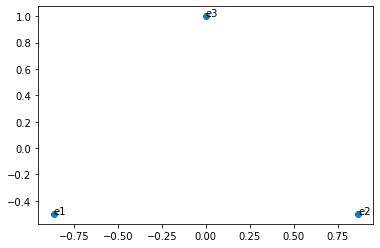

In [ ]:
x = E[:,0]
y = E[:,1]
point_labels = ['e1', 'e2', 'e3']
plt.scatter(E[:,0], E[:,1])
for i, txt in enumerate(point_labels):
    plt.annotate(txt, (x[i], y[i]))

Распределение Hi

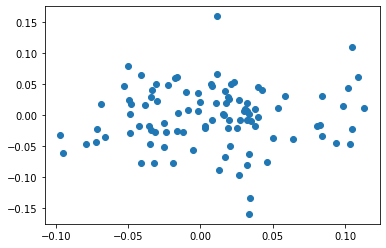

In [ ]:
plt.scatter(Hi[:,0], Hi[:,1])

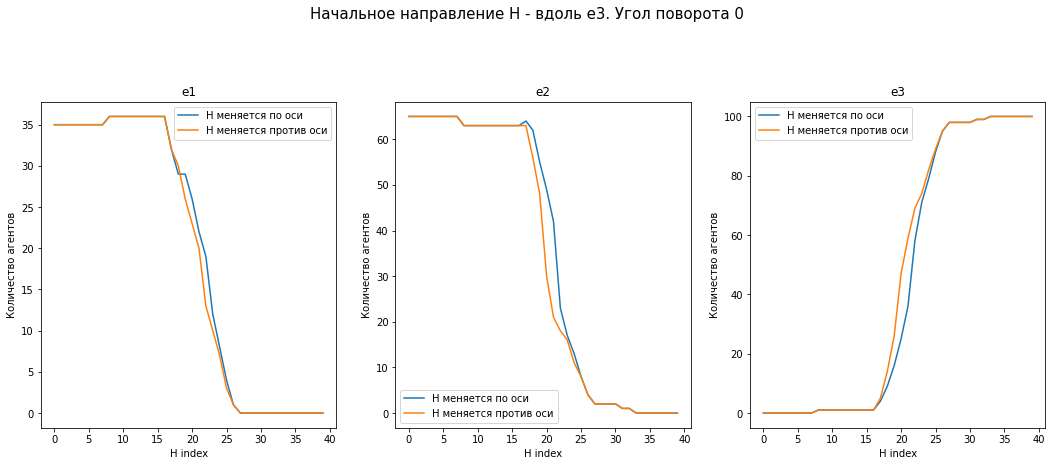

In [ ]:
angle=0
H_plus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[1]
conf_plus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[2]
H_minus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[4]
conf_minus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[5]

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
fig.suptitle('Начальное направление H - вдоль e3. Угол поворота 0', fontsize=15, y=1.1)
width = 0.3
for i in range(3):
    axes[i].plot(np.arange(H_plus.shape[0]), conf_plus[:,i], label='H меняется по оси')
    axes[i].plot(np.arange(H_minus.shape[0])[::-1], conf_minus[:,i], label='H меняется против оси')
    axes[i].set_title('e{}'.format(i+1))
    axes[i].set_xlabel('H index')
    axes[i].set_ylabel('Количество агентов')
    axes[i].legend()

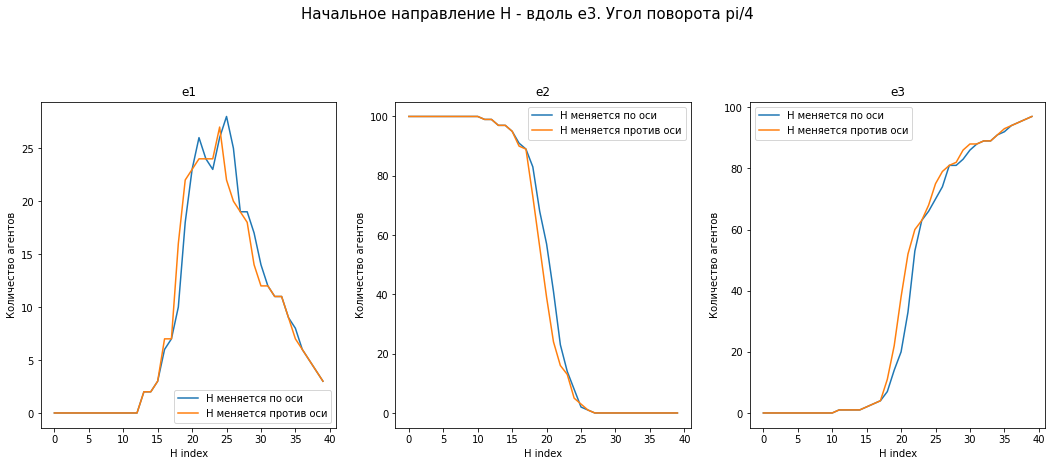

In [ ]:
angle=np.pi/4
H_plus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[1]
conf_plus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[2]
H_minus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[4]
conf_minus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[5]

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
fig.suptitle('Начальное направление H - вдоль e3. Угол поворота pi/4', fontsize=15, y=1.1)
width = 0.3
for i in range(3):
    axes[i].plot(np.arange(H_plus.shape[0]), conf_plus[:,i], label='H меняется по оси')
    axes[i].plot(np.arange(H_minus.shape[0])[::-1], conf_minus[:,i], label='H меняется против оси')
    axes[i].set_title('e{}'.format(i+1))
    axes[i].set_xlabel('H index')
    axes[i].set_ylabel('Количество агентов')
    axes[i].legend()

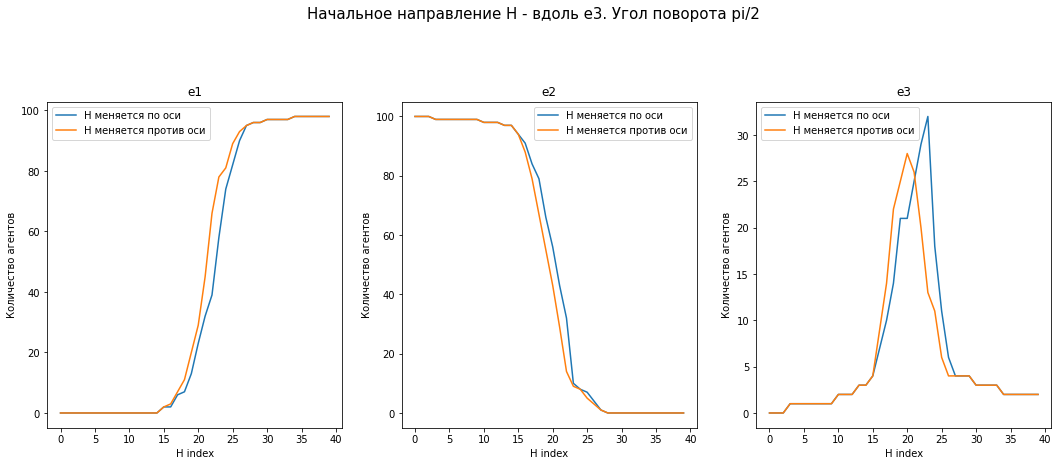

In [ ]:
angle=np.pi/2
H_plus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[1]
conf_plus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[2]
H_minus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[4]
conf_minus = soa_evolution_hyesteresis(Hi, J, E, N, S, H_ini_dir, angle, start, end, step)[5]

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
fig.suptitle('Начальное направление H - вдоль e3. Угол поворота pi/2', fontsize=15, y=1.1)
width = 0.3
for i in range(3):
    axes[i].plot(np.arange(H_plus.shape[0]), conf_plus[:,i], label='H меняется по оси')
    axes[i].plot(np.arange(H_minus.shape[0])[::-1], conf_minus[:,i], label='H меняется против оси')
    axes[i].set_title('e{}'.format(i+1))
    axes[i].set_xlabel('H index')
    axes[i].set_ylabel('Количество агентов')
    axes[i].legend()